# iPython Notebook for Pycon JP 2015 Presentation

In [12]:
%matplotlib inline
import redis
import matplotlib.pyplot as plt

cc_popular = redis.StrictRedis()
print(cc_popular.dbsize())

3561149


In [5]:
for row in cc_popular.keys('17e3f5ff4da952ec9d9f850a571a8d9cf5b1ec69:*:*'):
	s,p,o = row.decode().split(":")
	print(cc_popular.get(p).decode(), cc_popular.get(o).decode())

http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://bibframe.org/vocab/Work
http://bibframe.org/vocab/authorizedAccessPoint jankestevenj1947tinsleyfrederick1951introductiontolinearmodelsandstatisticalinferenceengworktext
http://bibframe.org/vocab/language http://id.loc.gov/vocabulary/languages/eng
http://bibframe.org/vocab/classificationLcc http://id.loc.gov/authorities/classification/QA279
http://bibframe.org/vocab/subject http://catalog.coloradocollege.edu/58052458topic9
http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://bibframe.org/vocab/Text
http://bibframe.org/vocab/workTitle http://catalog.coloradocollege.edu/58052458title5
http://bibframe.org/vocab/contributor http://catalog.coloradocollege.edu/58052458person7
http://bibframe.org/vocab/authorizedAccessPoint Janke, Steven J., 1947- Introduction to linear models and statistical inference / Steven J. Janke, Frederick C. Tinsley.Introduction to linear models and statistical inference
http://bibframe.org/vocab/creator http://

In [8]:
import timeit
setup_stmt = """import redis
cc_popular = redis.StrictRedis()"""
stmt="""cc_popular.keys("17e3f5ff4da952ec9d9f850a571a8d9cf5b1ec69:*:*")"""
redis_trials = []
for count in range(1, 11):
	redis_timer = timeit.timeit(stmt=stmt, setup=setup_stmt, number=count)
	redis_trials.append(redis_timer)


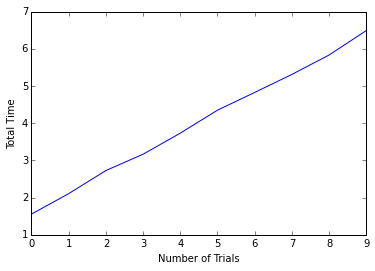

In [13]:
plt.plot(redis_trials)
plt.ylabel('Total Time')
plt.xlabel('Number of Trials')
plt.show()

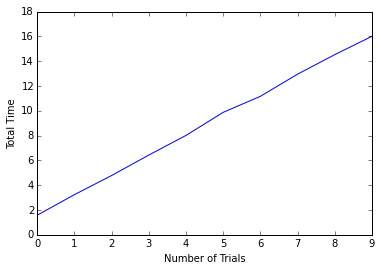

In [17]:
import requests
setup_stmt = """import requests"""
stmt="""requests.get("http://localhost:18150", data={"s": "http://catalog.coloradocollege.edu/58052458"})"""
falcon_trials = []
for count in range(1,11):
    falcon_timer = timeit.timeit(stmt=stmt, setup=setup_stmt, number=count)
    falcon_trials.append(falcon_timer)
plt.plot(falcon_trials)
plt.ylabel('Total Time')
plt.xlabel('Number of Trials')
plt.show()